In [301]:
import numpy as np
import serpentTools as st
from snapReactors.reactor_models.AutomatedSerpentModels.GCU.c3_radial_sens_2d.utilitities import*
import os
from numpy.linalg import norm
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}
#label = {"axes.labelweight"}

matplotlib.rc('font', **font)
plt.rcParams["axes.labelweight"] = "bold"

In [302]:
ringresFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3_1.main_res.m'
ringres = st.read(ringresFile, reader='results')

SERPENT Serpent 2.2.1 found in /Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


### System Analysis

In [303]:
# coreUni = ringres.universes['100', 0, 0, 0]
rootUni = ringres.universes['0', 0, 0, 0]

In [304]:
# rootUni.infExp.keys()

In [305]:
# ax = rootUni.plot('infTot', labels=['infAbs - system'])
# ax.grid()
# coreUni.plot('infTot', ax=ax, labels = ['infAbs - core'], legend='right')

In [306]:
def condense(universe, key, useInvFlux = False):
    cond = None
    if useInvFlux:
        invFlux = np.zeros(len(universe.infExp[key]))
        for i in range(0, len(invFlux)):
            invFlux[i] = 1/universe.infExp[key][i]
        cond = np.sum(np.multiply(universe.infExp[key], invFlux)/np.sum(invFlux))
    else:
        cond = np.sum(np.multiply(universe.infExp[key], universe.infExp['infFlx']))/np.sum(universe.infExp['infFlx'])
    return cond

In [307]:
fluxweight_coreTranspxs = condense(rootUni, 'infTranspxs')
invfluxweight_coreTranspxs = condense(rootUni, 'infTranspxs', useInvFlux=True)

fluxweight_coreDiff = 1/(3*fluxweight_coreTranspxs)
invfluxweight_coreDiff = 1/(3*invfluxweight_coreTranspxs)

print("fluxweighted infTranspxs : {:.3f}".format(fluxweight_coreTranspxs))
print("invfluxweighted infTranspxs mfp : {:.3f}".format(1/invfluxweight_coreTranspxs))

print("fluxweighted infDiff : {:.3f}".format(fluxweight_coreDiff))
print("invfluxweighted infDiff : {:.3f}".format(invfluxweight_coreDiff))

coreAbs = condense(rootUni, 'infAbs')

fluxweight_coreDiffLen = np.sqrt(fluxweight_coreDiff/coreAbs)
invfluxweight_coreDiffLen = np.sqrt(invfluxweight_coreDiff/coreAbs)

print("fluxweighted infAbs mfp : {:.3f}".format(1/coreAbs))

print("fluxweighted infDiffLen : {:.3f}".format(fluxweight_coreDiffLen))
print("invfluxweighted infDiffLen : {:.3f}".format(invfluxweight_coreDiffLen))  

fluxweighted infTranspxs : 0.444
invfluxweighted infTranspxs mfp : 3.059
fluxweighted infDiff : 0.750
invfluxweighted infDiff : 1.020
fluxweighted infAbs mfp : 49.968
fluxweighted infDiffLen : 6.123
invfluxweighted infDiffLen : 7.138


In [308]:
hisRes = st.read('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3.main_his0.m')

In [309]:
hisRes.arrays.keys()

dict_keys(['time', 'impKeff', 'anaKeff', 'colKeff', 'iterVal', 'meanPopSize', 'meanPopWgt', 'transportRuntime', 'transportCpuUsage', 'entrSpt', 'entrSwg'])

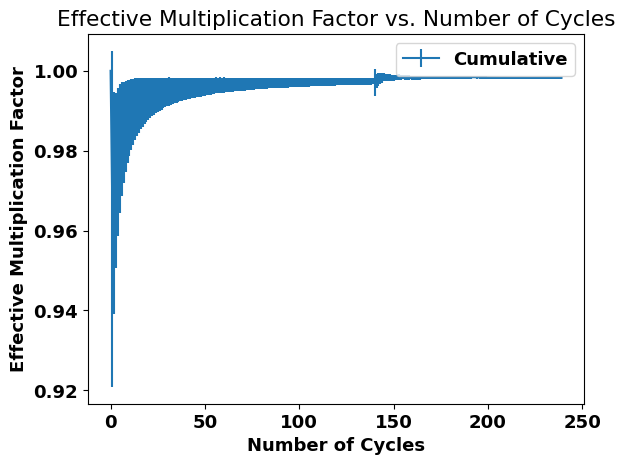

In [310]:
hKeff = hisRes['anaKeff']
hKu = hKeff[:, 2] * 3 * hKeff[:, 1]
cyc = np.arange(hKu.shape[0])
#plt.plot(cyc, hKeff[:, 0], label="Cycle")
plt.title("Effective Multiplication Factor vs. Number of Cycles")
plt.xlabel("Number of Cycles")
plt.ylabel("Effective Multiplication Factor")
plt.errorbar(cyc, hKeff[:, 1], yerr=hKu, label="Cumulative")
plt.legend()

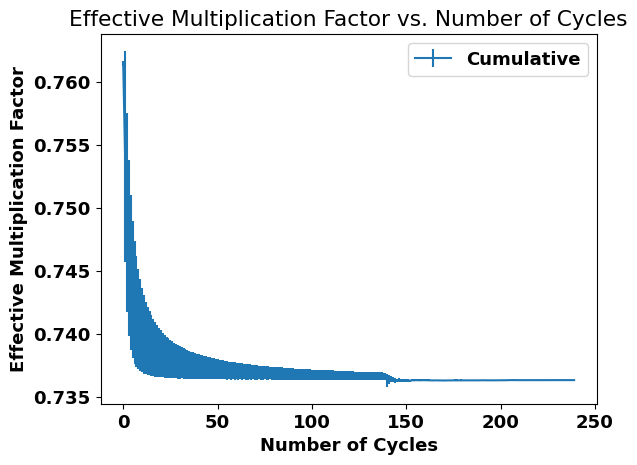

In [311]:
hKeff = hisRes['entrSwg']
hKu = hKeff[:, 2] * 3 * hKeff[:, 1]
cyc = np.arange(hKu.shape[0])
#plt.plot(cyc, hKeff[:, 0], label="Cycle")
plt.title("Effective Multiplication Factor vs. Number of Cycles")
plt.xlabel("Number of Cycles")
plt.ylabel("Effective Multiplication Factor")
plt.errorbar(cyc, hKeff[:, 1], yerr=hKu, label="Cumulative")
plt.legend()

### Radial GCU Resolution Study 2D

####  Make Sure Cases are unbiased torwards statistics on few-group data

In [312]:
maxs = []
max = None
maxunis = []
for uni in ringres.universes:
    maxs.append(np.max(ringres.universes[uni].infUnc['infTot']))
    maxunis.append(uni)
print(maxunis[np.where(maxs == np.max(maxs))[0][0] ], np.max(maxs))

UnivTuple(universe='6900', burnup=0, step=0, days=0) 0.02458


#### Keff Comparison

In [387]:
def kToPCM(k):
    return 1e5*((k-1)/k)

In [388]:
Experimental_rho  = -216

In [389]:
reffKeff = ringres.resdata['absKeff']
print("Reference Serpent Keff: {:.6}, pcm: {}".format(reffKeff[0],reffKeff[1]*1e5))

Reference Serpent Keff: 0.998287, pcm: 6.0


In [392]:
print("Serpent -  Experiment Difference pcm: {}".format(kToPCM(reffKeff[0]) - Experimental_rho ))

Serpent -  Experiment Difference pcm: 44.40605958006421


In [393]:
ringResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3_csv.csv', isSteady=True)

In [396]:
griff_rkeff = ringResDF['eigenvalue'][1]

# griff_rkeff = 0.99922191

print("ring resolution keff: {:.5f}, pcmDiff with Serpent: {:.1f}".format(griff_rkeff, kToPCM(griff_rkeff) - kToPCM(reffKeff[0])))

ring resolution keff: 0.99920, pcmDiff with Serpent: 91.3


In [399]:
print("ring resolution pcm: {:.5f}, pcmDiff with Experiment: {:.1f}".format(kToPCM(griff_rkeff), kToPCM(griff_rkeff) - Experimental_rho))

ring resolution pcm: -80.25564, pcmDiff with Experiment: 135.7


#### Verification of Few Group Spectrum

In [319]:
fgs_hr18 = [5.0000E-09, 2.5000E-08, 1.0000E-07, 4.0000E-07, 9.9600E-07, 3.0000E-06,
9.8770E-06, 2.7700E-05, 1.0000E-04, 5.5000E-04, 3.0000E-03, 1.5030E-02,
1.0000E-01, 4.0000E-01, 8.2100E-01, 1.3530E+00, 3.0000E+00, 6.0655E+00,
2.0000E+01]

In [320]:
refFGSFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3.main_det0.m'
refFGSDet = st.read(refFGSFile)
refFGS = refFGSDet['fgsdet']

In [321]:
def normZeroToOne(arr):
    normArr = np.zeros(len(arr))
    min = np.min(arr)
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i] - min)/(max - min)
    return normArr

In [322]:
def normMaximum(arr):
    normArr = np.zeros(len(arr))
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i])/(max)
        
    return normArr

In [323]:
def calcL2NormDiffPerc(ref,  comp):
    diff = np.subtract(ref, comp)
    diffNorm  = norm(diff)
    base = norm(ref)
    return (diffNorm/base)*100

def calcPercentRelativeError(ref, comp):
    relErr = []
    diff = np.abs(np.subtract(ref, comp))

    for i in range(0, len(diff)):
        if (diff[i] !=0 ) & (ref[i] !=0) :
            #relErr.append(2*(diff[i]/(np.abs(ref[i])+np.abs(comp[i]))))
            relErr.append(100*diff[i]/ref[i])
        elif (diff[i] == 0):
            maxRef = np.max(ref)
            relErr.append(0)
        else:
            maxRef = np.max(ref)
            relErr.append(100*diff[i]/maxRef)
        #print("diff: {:.2f}, comp: {:.2f}, ref: {:.2f}, relerror: {:.2f}".format(diff[i], comp[i], ref[i], relErr[i]))

    return relErr

In [324]:
normRefFGS = normMaximum(refFGS.tallies)

In [325]:
# plt.stairs(normRefFGS)

In [326]:
#collectFGS
nFewGroups = 18

griff_ringResFGS = []

for i in range(nFewGroups-1, -1, -1):
    griff_ringResFGS.append(ringResDF['Flux{}'.format(i+1)][1])


normGriff_ringResFGS = normMaximum(griff_ringResFGS)


In [327]:
groupBins = np.linspace(0, 18, 19).astype("int")
print(groupBins)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [328]:
ringRelError = calcPercentRelativeError(normRefFGS, normGriff_ringResFGS)
print(np.max(ringRelError))

2.4718122968977645


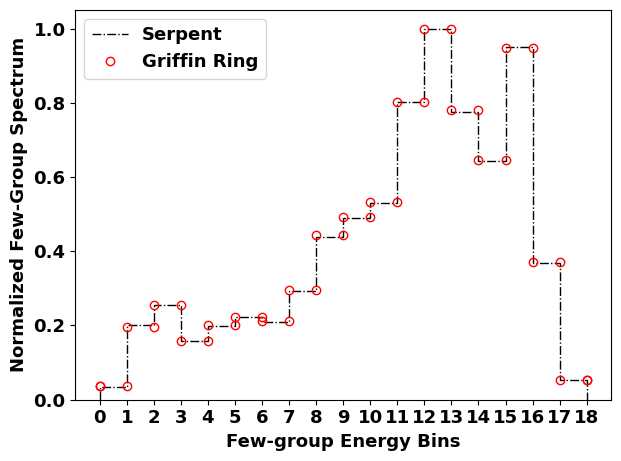

In [329]:

# plt.stairs(normGriff_ringResFGS, groupBins, label = "Griffin_Ring", linewidth = 1, alpha = 1, linestyle = ":")
plt.stairs(normRefFGS, groupBins, label = "Serpent", color = "k", alpha = 1, linewidth = "1", linestyle = "-.")
plt.xticks(groupBins)

plt.plot(np.repeat(groupBins, 2), np.hstack([normGriff_ringResFGS[0], np.repeat(normGriff_ringResFGS, 2), normGriff_ringResFGS[-1]]),
         'o', color='red', alpha=1, label = "Griffin Ring",markerfacecolor='None')
# plt.plot(np.repeat(bins, 2), np.hstack([normGriff_elemResFGS[0], np.repeat(normGriff_elemResFGS, 2), normGriff_elemResFGS[-1]]),
#          '*', color='blue', alpha=0.6, label = "Griffin Element")


plt.xlabel("Few-group Energy Bins")
plt.ylabel("Normalized Few-Group Spectrum")
plt.legend(loc='upper left')
plt.tight_layout()
#plt.grid()

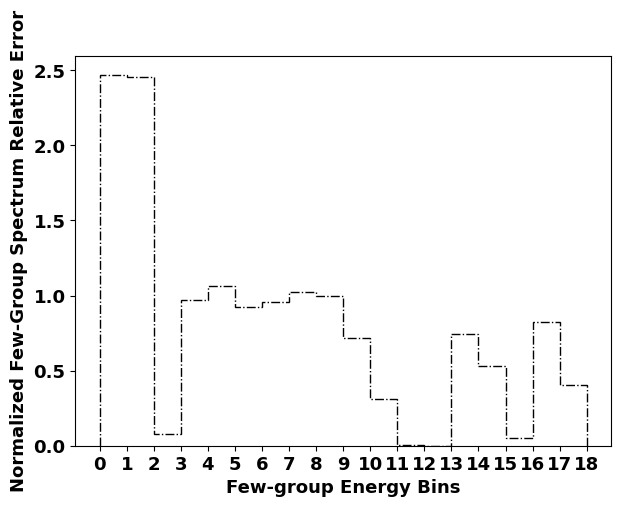

In [330]:
plt.stairs(ringRelError, groupBins, label = "Serpent", color = "k", alpha = 1, linewidth = "1", linestyle = "-.")
plt.xticks(groupBins)
plt.xlabel("Few-group Energy Bins")
plt.ylabel("Normalized Few-Group Spectrum Relative Error")
# plt.legend(loc='upper right')
plt.tight_layout()

In [331]:
def calcL2NormDiffPerc(ref,  comp):
    diff = np.subtract(ref, comp)
    diffNorm  = norm(diff)
    base = norm(ref)
    return (diffNorm/base)*100

def calcPercentRelativeError(ref, comp):
    relErr = []
    diff = np.abs(np.subtract(ref, comp))

    for i in range(0, len(diff)):
        if (diff[i] !=0 ) & (ref[i] !=0) :
            #relErr.append(2*(diff[i]/(np.abs(ref[i])+np.abs(comp[i]))))
            relErr.append(100*diff[i]/ref[i])
        elif (diff[i] == 0):
            maxRef = np.max(ref)
            relErr.append(0)
        else:
            maxRef = np.max(ref)
            relErr.append(100*diff[i]/maxRef)
        #print("diff: {:.2f}, comp: {:.2f}, ref: {:.2f}, relerror: {:.2f}".format(diff[i], comp[i], ref[i], relErr[i]))

    return relErr

In [332]:
ringL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_ringResFGS)

In [400]:
print("ring resolution FGS l2normDiff (%): {:.3f}".format(ringL2NormDiffFGS))
print(np.max(ringRelError))

ring resolution FGS l2normDiff (%): 0.538
2.4718122968977645


#### Flux Map Comparison

In [334]:
ringRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3.main_det0.m'
ringRefMapDet = st.read(ringRefMapFile, reader='det')

In [335]:
def griffinFluxMapReader(path):
    keys = ['volume', 'nufiss', 'power', 'absorption', 'scalar']
    block = []
    vol = []
    nufiss = []
    pow = []
    abs = []
    scalar = []
    with open(path, "r") as f:
        lines = f.readlines()
        f.close()

    bidx = None
    eidx = None
    hasBegun = False
    for ldx, line in enumerate(lines):
        if "Block average" in line:
            bidx = ldx+2
            hasBegun = True 
        if (line == "\n") & hasBegun:
            eidx = ldx
            break
    
    data = lines[bidx:eidx]

    dicts = []

    for i in range(0, len(data)):
        vals  = data[i].split()
        block.append(vals[0])
        vol.append(float(vals[1]))
        nufiss.append(float(vals[2]))
        pow.append(float(vals[3]))
        abs.append(float(vals[4]))
        scalar.append(float(vals[5]))

        dset = [vol[i], nufiss[i], pow[i], abs[i], scalar[i]]
        dicts.append(dict(zip(keys, dset)))


    map = dict(zip(block, dicts))
    return map

In [336]:
ringGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/c3_flux_map.txt')

In [337]:
ringGriffBlockMap

{'9': {'volume': 1329.057248,
  'nufiss': 0.0,
  'power': 0.0,
  'absorption': 4.453099e-08,
  'scalar': 0.008845718},
 '20': {'volume': 651.948459,
  'nufiss': 0.0,
  'power': 0.0,
  'absorption': 3.194911e-09,
  'scalar': 0.0006018851},
 '40': {'volume': 716.518434,
  'nufiss': 0.0,
  'power': 0.0,
  'absorption': 3.311411e-09,
  'scalar': 0.0006202902},
 '71': {'volume': 36.956005,
  'nufiss': 0.0003749189,
  'power': 4.992731e-15,
  'absorption': 0.0002248939,
  'scalar': 0.006849613},
 '72': {'volume': 63.353152,
  'nufiss': 0.0003659105,
  'power': 4.872827e-15,
  'absorption': 0.0002195245,
  'scalar': 0.006670919},
 '73': {'volume': 95.029728,
  'nufiss': 0.0003516928,
  'power': 4.683531e-15,
  'absorption': 0.0002110422,
  'scalar': 0.006398249},
 '74': {'volume': 126.706304,
  'nufiss': 0.0003325835,
  'power': 4.429123e-15,
  'absorption': 0.0001995057,
  'scalar': 0.006028649},
 '75': {'volume': 158.382879,
  'nufiss': 0.0003099315,
  'power': 4.127617e-15,
  'absorption':

In [338]:
def getBlock2UniMap(df, blockMap):
    uniMap = {}
    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    bkeyu = {}

    for bdx, block in enumerate(blocks):
        bkeyu[block.replace("block_", "")] = str(int(unis[bdx]))
        #print(unis[bdx])

    for block in blockMap:
        uniMap[bkeyu[block]] = blockMap[block]
    
    return uniMap, bkeyu

In [339]:
def getUni2BlockMap(df, uniMap):
    blockMap = {}

    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    ukeyb = {}

    for bdx, block in enumerate(blocks):
        ukeyb[str(int(unis[bdx]))] = block.replace("block_", "")

    for uni in uniMap:
        # uniMap[bkeyu[block]] = blockMap[block]

        blockMap[ukeyb[uni]] = uniMap[str(uni)]
    return blockMap, ukeyb

In [340]:
ringCellData = pd.read_csv('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3_cellData.csv')


In [341]:
ringGriffMap, bkeyu = getBlock2UniMap(ringCellData, ringGriffBlockMap)

In [342]:
ukeyb


{'900': '9',
 '8000': '20',
 '7500': '40',
 '2100': '71',
 '2200': '72',
 '2300': '73',
 '2400': '74',
 '2500': '75',
 '2600': '76',
 '2700': '77',
 '2800': '78',
 '3100': '79',
 '1100': '81',
 '1200': '82',
 '1300': '83',
 '1400': '84',
 '1500': '85',
 '1600': '86',
 '1700': '87',
 '1800': '88',
 '2000': '89',
 '101': '101',
 '201': '102',
 '301': '103',
 '401': '104',
 '501': '105',
 '601': '106',
 '701': '107',
 '801': '108',
 '7000': '124',
 '7100': '125',
 '7200': '126',
 '7300': '127',
 '7400': '128',
 '6500': '133',
 '6600': '134',
 '6700': '135',
 '6800': '136',
 '6900': '137',
 '102': '201',
 '202': '202',
 '302': '203',
 '402': '204',
 '502': '205',
 '602': '206',
 '702': '207',
 '802': '208',
 '9400': '210',
 '9100': '251',
 '103': '301',
 '203': '302',
 '303': '303',
 '403': '304',
 '503': '305',
 '603': '306',
 '703': '307',
 '803': '308',
 '9500': '340',
 '104': '401',
 '204': '402',
 '304': '403',
 '404': '404',
 '504': '405',
 '604': '406',
 '704': '407',
 '804': '408',

In [343]:
# print(coreGriffMap)
# print(ringGriffMap)
# print(elemGriffMap)

In [344]:

ringUnis = list(ringGriffMap.keys())

# print(createDetectors(coreUnis))
# print(createDetectors(ringUnis))
# print(createDetectors(elemUnis))

In [345]:
def getUniValsList(map, attr):
    vals = []
    for uni in map:
        vals.append(map[uni][attr])
    return vals

In [346]:
coreNuFissMap = {}
coreCapMap = {}

coreNuFiss = []
coreCap = []

ringNuFissMap = {}
ringCapMap = {}

ringNuFiss = []
ringCap = []

elemNuFissMap = {}
elemCapMap = {}

elemNuFiss = []
elemCap = []



for uni in ringUnis:
    ringNuFissMap[uni] = ringRefMapDet["nuFissRate{}".format(uni)]
    ringCapMap[uni] = ringRefMapDet["scalarFlux{}".format(uni)]



In [347]:

for uni in ringNuFissMap:
    ringNuFiss.append(ringNuFissMap[uni].tallies/ringGriffMap[uni]['volume'])
    ringCap.append(ringCapMap[uni].tallies/ringGriffMap[uni]['volume'])

In [348]:
griffRingNuFiss = getUniValsList(ringGriffMap, 'nufiss')
griffRingScalar = getUniValsList(ringGriffMap, 'scalar')

In [349]:
ringNuFissMap

{'900': <serpentTools.detectors.Detector at 0x7fb0bb3fbc70>,
 '8000': <serpentTools.detectors.Detector at 0x7fb09dc8eaf0>,
 '7500': <serpentTools.detectors.Detector at 0x7fb09e37c910>,
 '2100': <serpentTools.detectors.Detector at 0x7fb09d693b20>,
 '2200': <serpentTools.detectors.Detector at 0x7fb09d6936d0>,
 '2300': <serpentTools.detectors.Detector at 0x7fb09d693280>,
 '2400': <serpentTools.detectors.Detector at 0x7fb09d6937c0>,
 '2500': <serpentTools.detectors.Detector at 0x7fb0a03589a0>,
 '2600': <serpentTools.detectors.Detector at 0x7fb0a0358a00>,
 '2700': <serpentTools.detectors.Detector at 0x7fb0a0358940>,
 '2800': <serpentTools.detectors.Detector at 0x7fb0a0358970>,
 '3100': <serpentTools.detectors.Detector at 0x7fb0a03587f0>,
 '1100': <serpentTools.detectors.Detector at 0x7fb0bb3fb0d0>,
 '1200': <serpentTools.detectors.Detector at 0x7fb0bb3fb430>,
 '1300': <serpentTools.detectors.Detector at 0x7fb0bb3fbb50>,
 '1400': <serpentTools.detectors.Detector at 0x7fb0bb3fb9d0>,
 '1500': 

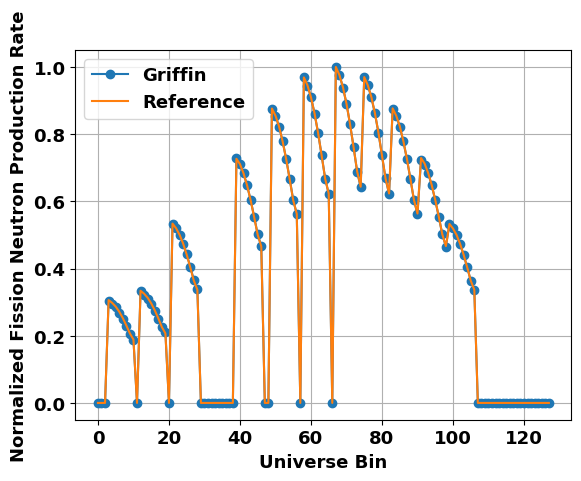

In [350]:
plt.plot(normMaximum(griffRingNuFiss), label = "Griffin", marker = "o")
plt.plot(normMaximum(ringNuFiss), label = "Reference")
plt.ylabel("Normalized Fission Neutron Production Rate")
plt.xlabel("Universe Bin")
plt.legend()
plt.grid()

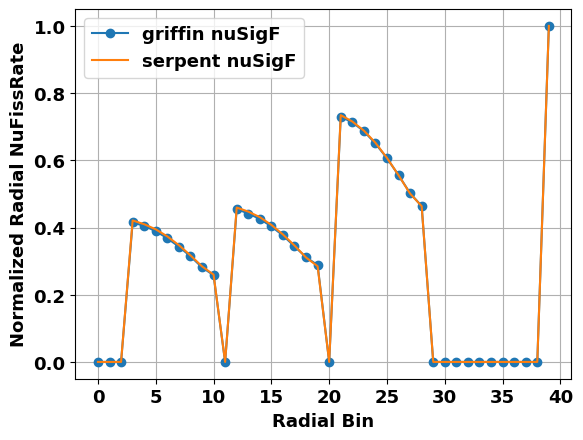

In [351]:
plt.plot(normMaximum(griffRingNuFiss[0:40]), label = "griffin nuSigF", marker = "o")
plt.plot(normMaximum(ringNuFiss[0:40]), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

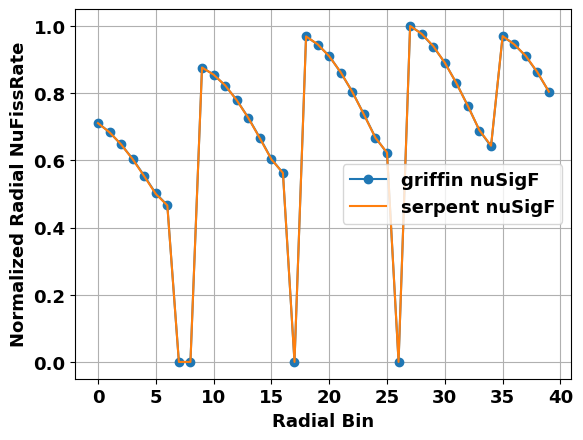

In [352]:
plt.plot(normMaximum(griffRingNuFiss[40:80]), label = "griffin nuSigF", marker = "o")
plt.plot(normMaximum(ringNuFiss[40:80]), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

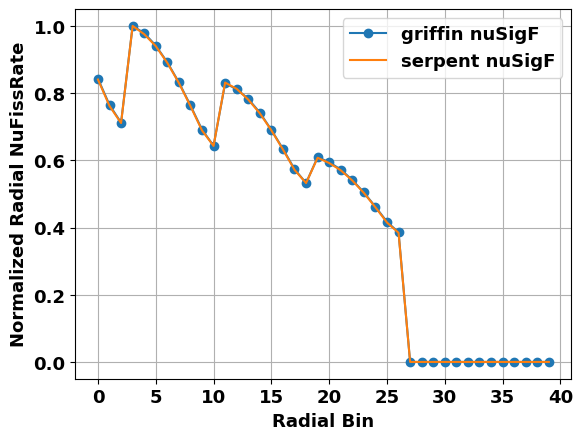

In [353]:
plt.plot(normMaximum(griffRingNuFiss[80:120]), label = "griffin nuSigF", marker = "o")
plt.plot(normMaximum(ringNuFiss[80:120]), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

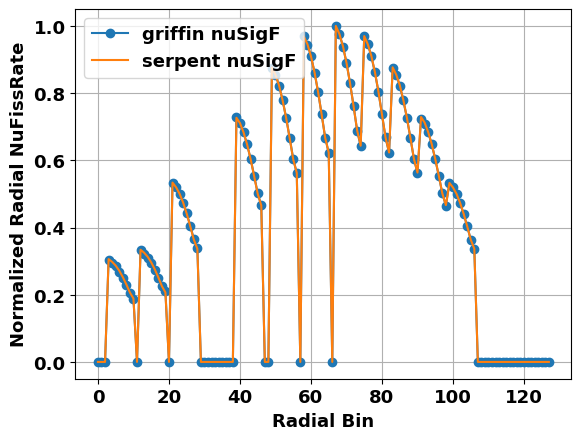

In [354]:
plt.plot(normMaximum(griffRingNuFiss), label = "griffin nuSigF", marker = "o")
plt.plot(normMaximum(ringNuFiss), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

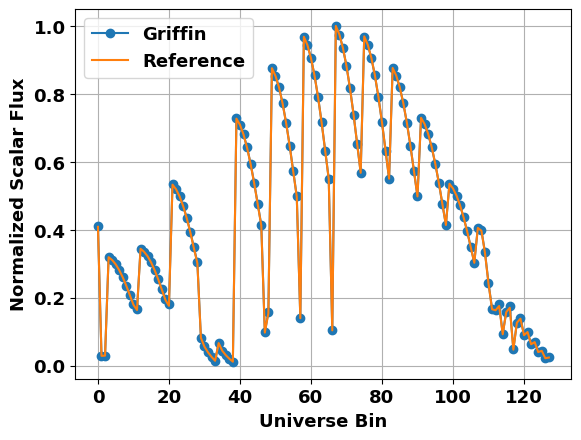

In [355]:
plt.plot(normMaximum(griffRingScalar), label = "Griffin", marker = "o")
plt.plot(normMaximum(ringCap), label = "Reference")
plt.ylabel("Normalized Scalar Flux")
plt.xlabel("Universe Bin")
plt.legend()
plt.grid()

In [356]:
ringL2NormDiffNuFiss = calcL2NormDiffPerc(normMaximum(ringNuFiss), normMaximum(griffRingNuFiss))
print("ring resolution NuFissRate l2normDiff (%): {:.3f}".format(ringL2NormDiffNuFiss))


ring resolution NuFissRate l2normDiff (%): 0.226


In [357]:
ringL2NormDiffScalar = calcL2NormDiffPerc(normMaximum(ringCap), normMaximum(griffRingScalar))
print("ring resolution ScalarFlux l2normDiff (%): {:.3f}".format(ringL2NormDiffScalar))

ring resolution ScalarFlux l2normDiff (%): 0.246


In [358]:
ringNuFissRateRelError = calcPercentRelativeError(normMaximum(ringNuFiss), normMaximum(griffRingNuFiss))
ringNuFissRateRelErrorMap = dict(zip(ringUnis, ringNuFissRateRelError))

ringScalarRelError = calcPercentRelativeError(normMaximum(ringCap), normMaximum(griffRingScalar))
ringScalarRelErrorMap = dict(zip(ringUnis, ringScalarRelError))

In [359]:
serpNuFissMap = dict(zip(ringUnis, normMaximum(ringNuFiss)))
griffNuFissMap = dict(zip(ringUnis, normMaximum(griffRingNuFiss)))

serpScalarMap = dict(zip(ringUnis, normMaximum(ringCap)))
griffScalarMap = dict(zip(ringUnis, normMaximum(griffRingScalar)))

In [360]:
errorArr = np.ones(len(ringNuFissRateRelError))*5
highErrorsIdx = np.where(ringScalarRelError > errorArr)[0]

for idx, index in enumerate(highErrorsIdx):
    print(ringUnis[index], ringScalarRelError[index])


6900 6.107513445391883


In [361]:
maxNuFissError = np.max(ringNuFissRateRelError)
maxScalarError = np.max(ringScalarRelError)

In [362]:
print("max nufiss relerr (%): {:.3f}".format(maxNuFissError))
print("max total scalflux relerr (%): {:.3f}".format(maxScalarError))

max nufiss relerr (%): 1.567
max total scalflux relerr (%): 6.108


In [363]:
for uni in ringScalarRelErrorMap:
    if ringScalarRelErrorMap[uni] == maxScalarError:
        print(uni)


6900


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


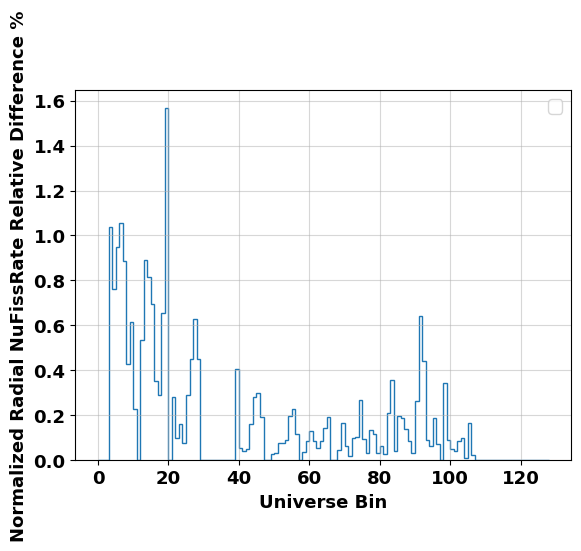

In [364]:
plt.stairs(ringNuFissRateRelError , alpha = 1)
plt.ylabel("Normalized Radial NuFissRate Relative Difference %")
plt.xlabel("Universe Bin")
plt.legend()
plt.grid(alpha = 0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


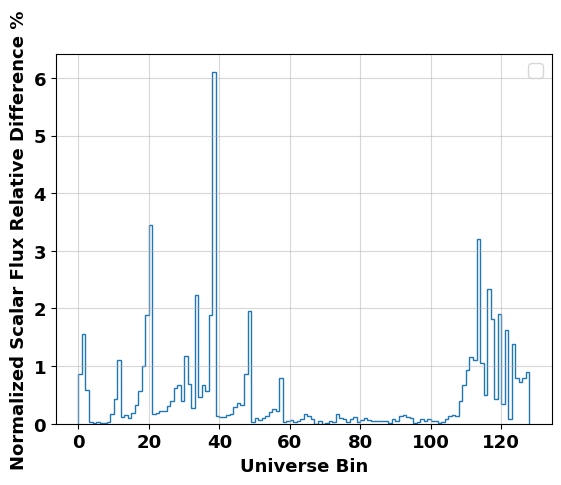

In [365]:
plt.stairs(ringScalarRelError , alpha = 1)
plt.ylabel("Normalized Scalar Flux Relative Difference %")
plt.xlabel("Universe Bin")
plt.legend()
plt.grid(alpha = 0.5)

In [366]:
def createAppendCSV(cellData, keys, params, vals, exportPath, useBlockId = False):
    xyz = ['x', 'y', 'z']

    for param in params:
        xyz.append(param)

    appendDF = pd.DataFrame(columns=xyz)

    map = {}

    for key in keys:
        for pdx, param in enumerate(params):
            map[key] = {}
            
    for kdx, key in enumerate(keys):
        for pdx, param in enumerate(params):
            map[key][param] = vals[pdx][kdx]

    
    if not useBlockId:
        pointKeys = np.array(list(cellData['material_id'])).astype('int')
    else:
        pointKeys = []
        blocks = list(cellData['Block Name'])
        for i in range(0, len(blocks)):
            pointKeys.append(int(blocks[i].replace("block_", "")))

    appendDF['x'] = list(cellData['Points_0'])
    appendDF['y'] = list(cellData['Points_1'])
    appendDF['z'] = list(cellData['Points_2'])

    for param in params:
        pointData = []
        for i in range(0, len(pointKeys)):
            pointData.append(map[str(pointKeys[i])][param])
        
        appendDF[param] = pointData

    appendDF.to_csv(exportPath, index=False)
    
    return appendDF

In [367]:
def createAppendCSVNEW(keys, maps, path):
    keys.append("matid")  
    appendDF = pd.DataFrame(columns= keys)


    for kdx, key in enumerate(keys):
        temp = []
        for matId in maps[0]:
            if key == "matid":
                #print(matId)
                temp.append(matId)
            else:
                #print(maps[kdx][matId])
                temp.append(maps[kdx][matId])
        appendDF[key] = temp
            
    appendDF.to_csv(path, index=False)
    return appendDF

In [368]:
cellDataPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3_cellDataAppend.csv'
keys = ['norm_RefnuFissRate', 'norm_griffnuFissRate', 'nuFissRateRelError', 'norm_RefscalarFlux', 'norm_griffscalarFlux', 'scalarFluxRelError']
maps = [serpNuFissMap, griffNuFissMap, ringNuFissRateRelErrorMap, serpScalarMap, griffScalarMap, ringScalarRelErrorMap]
createAppendCSVNEW(keys, maps, cellDataPath)

,norm_RefnuFissRate,norm_griffnuFissRate,nuFissRateRelError,norm_RefscalarFlux,norm_griffscalarFlux,scalarFluxRelError,matid
0,0.00000,0.00000,0.00000,0.40840,0.41189,0.85443,900
1,0.00000,0.00000,0.00000,0.02847,0.02803,1.56311,8000
2,0.00000,0.00000,0.00000,0.02905,0.02888,0.58493,7500
3,0.30597,0.30280,1.03722,0.31903,0.31895,0.02451,2100
4,0.29780,0.29552,0.76354,0.31066,0.31063,0.01203,2200
...,...,...,...,...,...,...,...
123,0.00000,0.00000,0.00000,0.06903,0.06999,1.38764,5700
124,0.00000,0.00000,0.00000,0.03960,0.03928,0.79367,6300
125,0.00000,0.00000,0.00000,0.04333,0.04365,0.73078,5800
126,0.00000,0.00000,0.00000,0.02153,0.02136,0.79974,6400


In [369]:
def readSerpentVols(path):
    volDict = {}
    f = open(path, "r")
    lines = f.readlines()

    bdx = None

    for ldx, line in enumerate(lines):
        if "set mvol" in line:
            bdx = ldx + 2
            break
    for i in range(bdx, len(lines)):
        vals = lines[i].split()
        volDict[vals[0]] = float(vals[2])

    return volDict

In [370]:
uniMCVolsPath = "snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/s83d_c3_update_volumeTally.geo.mvol"

In [371]:
serpVols = readSerpentVols(uniMCVolsPath)

In [372]:
serpVols

{'9400': 352.394,
 '8000': 651.903,
 '9100': 428.036,
 '7000': 160.492,
 '7100': 129.206,
 '7200': 142.342,
 '7300': 155.108,
 '7400': 204.268,
 '2000': 94.7162,
 '1800': 165.581,
 '1700': 165.808,
 '1600': 141.805,
 '1500': 118.304,
 '1400': 94.5173,
 '1300': 70.9838,
 '1200': 47.3001,
 '1100': 27.6941,
 '3500': 15.0102,
 '3600': 20.8246,
 '5500': 361.033,
 '5600': 291.229,
 '5700': 319.93,
 '5800': 348.835,
 '5900': 460.287,
 '900': 1329.46,
 '801': 258.034,
 '802': 258.306,
 '803': 257.982,
 '804': 258.265,
 '805': 258.002,
 '806': 258.086,
 '807': 257.993,
 '808': 257.989,
 '809': 258.277,
 '701': 258.263,
 '702': 258.224,
 '703': 258.264,
 '704': 258.24,
 '705': 257.973,
 '706': 258.369,
 '707': 258.228,
 '708': 258.279,
 '709': 258.383,
 '601': 221.366,
 '602': 221.379,
 '603': 221.301,
 '604': 221.368,
 '605': 221.289,
 '606': 221.131,
 '607': 221.294,
 '608': 221.272,
 '609': 221.103,
 '501': 184.386,
 '502': 184.476,
 '503': 184.314,
 '504': 184.437,
 '505': 184.374,
 '506': 1

In [373]:
bkeyu

{'9': '900',
 '20': '8000',
 '40': '7500',
 '71': '2100',
 '72': '2200',
 '73': '2300',
 '74': '2400',
 '75': '2500',
 '76': '2600',
 '77': '2700',
 '78': '2800',
 '79': '3100',
 '81': '1100',
 '82': '1200',
 '83': '1300',
 '84': '1400',
 '85': '1500',
 '86': '1600',
 '87': '1700',
 '88': '1800',
 '89': '2000',
 '101': '101',
 '102': '201',
 '103': '301',
 '104': '401',
 '105': '501',
 '106': '601',
 '107': '701',
 '108': '801',
 '124': '7000',
 '125': '7100',
 '126': '7200',
 '127': '7300',
 '128': '7400',
 '133': '6500',
 '134': '6600',
 '135': '6700',
 '136': '6800',
 '137': '6900',
 '201': '102',
 '202': '202',
 '203': '302',
 '204': '402',
 '205': '502',
 '206': '602',
 '207': '702',
 '208': '802',
 '210': '9400',
 '251': '9100',
 '301': '103',
 '302': '203',
 '303': '303',
 '304': '403',
 '305': '503',
 '306': '603',
 '307': '703',
 '308': '803',
 '340': '9500',
 '401': '104',
 '402': '204',
 '403': '304',
 '404': '404',
 '405': '504',
 '406': '604',
 '407': '704',
 '408': '804',

In [374]:
ukeyb = dict(zip(bkeyu.values(), bkeyu.keys()))

In [375]:
ukeyb['6900']

'137'

In [376]:
serpBlocksVols = {}
for uni in ukeyb:
    serpBlocksVols[ukeyb[uni]] = serpVols[uni] 

In [377]:
serpBlocksVols


{'9': 1329.46,
 '20': 651.903,
 '40': 716.453,
 '71': 36.945,
 '72': 63.3733,
 '73': 94.9664,
 '74': 126.737,
 '75': 158.262,
 '76': 190.239,
 '77': 221.737,
 '78': 221.542,
 '79': 126.725,
 '81': 27.6941,
 '82': 47.3001,
 '83': 70.9838,
 '84': 94.5173,
 '85': 118.304,
 '86': 141.805,
 '87': 165.808,
 '88': 165.581,
 '89': 94.7162,
 '101': 42.9955,
 '102': 73.8086,
 '103': 110.632,
 '104': 147.446,
 '105': 184.386,
 '106': 221.366,
 '107': 258.263,
 '108': 258.034,
 '124': 160.492,
 '125': 129.206,
 '126': 142.342,
 '127': 155.108,
 '128': 204.268,
 '133': 38.0218,
 '134': 30.6638,
 '135': 33.668,
 '136': 36.7821,
 '137': 48.3787,
 '201': 43.1864,
 '202': 73.7743,
 '203': 110.48,
 '204': 147.507,
 '205': 184.476,
 '206': 221.379,
 '207': 258.224,
 '208': 258.306,
 '210': 352.394,
 '251': 428.036,
 '301': 43.0467,
 '302': 73.804,
 '303': 110.524,
 '304': 147.563,
 '305': 184.314,
 '306': 221.301,
 '307': 258.264,
 '308': 257.982,
 '340': 101.317,
 '401': 43.0429,
 '402': 73.7379,
 '403'

In [378]:
blockStr = ""
volStr = ""
for block in serpBlocksVols:
    blockStr = blockStr + " " + block
    volStr = volStr + " {}".format( serpBlocksVols[block])

In [379]:
blockStr

' 9 20 40 71 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 101 102 103 104 105 106 107 108 124 125 126 127 128 133 134 135 136 137 201 202 203 204 205 206 207 208 210 251 301 302 303 304 305 306 307 308 340 401 402 403 404 405 406 407 408 410 501 502 503 504 505 506 507 508 601 602 603 604 605 606 607 608 701 702 703 704 705 706 707 708 801 802 803 804 805 806 807 808 901 902 903 904 905 906 907 908 1000 1100 1200 1300 1400 1401 1402 1500 1501 1502 1600 1601 1602 1701 1702 1801 1802 1901 1902 2001 2002'

In [380]:
volStr

' 1329.46 651.903 716.453 36.945 63.3733 94.9664 126.737 158.262 190.239 221.737 221.542 126.725 27.6941 47.3001 70.9838 94.5173 118.304 141.805 165.808 165.581 94.7162 42.9955 73.8086 110.632 147.446 184.386 221.366 258.263 258.034 160.492 129.206 142.342 155.108 204.268 38.0218 30.6638 33.668 36.7821 48.3787 43.1864 73.7743 110.48 147.507 184.476 221.379 258.224 258.306 352.394 428.036 43.0467 73.804 110.524 147.563 184.314 221.301 258.264 257.982 101.317 43.0429 73.7379 110.732 147.365 184.437 221.368 258.24 258.265 387.179 43.0088 73.8935 110.636 147.543 184.374 221.289 257.973 258.002 43.0647 73.7636 110.6 147.557 184.453 221.131 258.369 258.086 42.9589 73.7761 110.629 147.445 184.317 221.294 258.228 257.993 42.8794 73.6651 110.645 147.541 184.247 221.272 258.279 257.989 42.9859 73.7415 110.767 147.575 184.192 221.103 258.383 258.277 210.922 292.932 5066.1 4084.92 4489.95 20.0221 15.0102 4896.64 27.9481 20.8246 6456.66 483.157 361.033 389.674 291.229 428.787 319.93 467.37 348.835 

In [381]:
voldf = pd.read_csv("snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_griffin/test/s83d_c3_csv_integral_0000.csv")

In [382]:
unis = list(voldf['Level-0-material_id'])
vols = list(voldf['Unity'])
ids_str = map(str, unis)
griffVols = dict(zip(ids_str, vols))

In [383]:
griffVols

{'101': 43.034649436812,
 '102': 43.034649436812,
 '103': 43.034649436812,
 '104': 43.034649436812,
 '105': 43.034649436812,
 '106': 43.034649436812,
 '107': 43.034649436812,
 '108': 43.034649436812,
 '109': 43.034649436812,
 '201': 73.77368474882,
 '202': 73.77368474882,
 '203': 73.77368474882,
 '204': 73.77368474882,
 '205': 73.77368474882,
 '206': 73.77368474882,
 '207': 73.77368474882,
 '208': 73.77368474882,
 '209': 73.77368474882,
 '301': 110.66052712323,
 '302': 110.66052712323,
 '303': 110.66052712323,
 '304': 110.66052712323,
 '305': 110.66052712323,
 '306': 110.66052712323,
 '307': 110.66052712323,
 '308': 110.66052712323,
 '309': 110.66052712323,
 '401': 147.54736949764,
 '402': 147.54736949764,
 '403': 147.54736949764,
 '404': 147.54736949764,
 '405': 147.54736949764,
 '406': 147.54736949764,
 '407': 147.54736949764,
 '408': 147.54736949764,
 '409': 147.54736949764,
 '501': 184.43421187205,
 '502': 184.43421187205,
 '503': 184.43421187205,
 '504': 184.43421187205,
 '505': 1

In [384]:
for uni in griffVols:
    print("{}: {} | {} | {}".format(uni, griffVols[uni], serpVols[uni],  100*(serpVols[uni] - griffVols[uni])/serpVols[uni]))

101: 43.034649436812 | 42.9955 | -0.0910547308718437
102: 43.034649436812 | 43.1864 | 0.3513850730507651
103: 43.034649436812 | 43.0467 | 0.027994162590855767
104: 43.034649436812 | 43.0429 | 0.019168232595851254
105: 43.034649436812 | 43.0088 | -0.060102669249089906
106: 43.034649436812 | 43.0647 | 0.06978003605737086
107: 43.034649436812 | 42.9589 | -0.17633001965134937
108: 43.034649436812 | 42.8794 | -0.36206065572747415
109: 43.034649436812 | 42.9859 | -0.11340797054848799
201: 73.77368474882 | 73.8086 | 0.04730512593382847
202: 73.77368474882 | 73.7743 | 0.0008339641040226034
203: 73.77368474882 | 73.804 | 0.04107534981843713
204: 73.77368474882 | 73.7379 | -0.048529655468906065
205: 73.77368474882 | 73.8935 | 0.16214586016361432
206: 73.77368474882 | 73.7636 | -0.013671714531294548
207: 73.77368474882 | 73.7761 | 0.0032737582767276368
208: 73.77368474882 | 73.6651 | -0.14740324634054303
209: 73.77368474882 | 73.7415 | -0.04364536769661678
301: 110.66052712323 | 110.632 | -0.0257